In [1]:
import numpy as np # linear algebra
import pandas as pd 

# About Dataset
## Context

This dataset contains 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from that used in CMS physics results.

## Content

1) Run: The run number of the event.  
2) Event: The event number.  
3, 11) E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.   
4, 5, 6, 12, 13, 14) px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV).   
7, 15) pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).   
8, 16) eta1, eta2: The pseudorapidity of the electron 1 and 2.   
9, 17) phi1, phi2: The phi angle of the electron 1 and 2 (rad).   
10, 18) Q1, Q2: The charge of the electron 1 and 2.    
19) M: The invariant mass of two electrons (GeV).   

## Acknowledgements

Cite as: McCauley, Thomas; (2014). https://opendata.cern.ch/record/304

## Inspiration

The data was taken from the CERN Open Data Portal: https://opendata.cern.ch/
The open data are released under the Creative Commons CC0 waiver. Neither CMS nor CERN endorse any works, scientific or otherwise, produced using these data. All releases will have a unique DOI that you are requested to cite in any applications or publications.

In [2]:
data = pd.read_csv('../input/cern-electron-collision-data/dielectron.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [4]:
# there are some data points which are missing in 'M' column so I am hoing to fill in by the median value of the column
data['M'].fillna(data['M'].median(),inplace=True)

In [5]:
data.head(5)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [6]:
data['Total Energy'] = data['E1'] + data['E2']

In [7]:
'''
from pandas_profiling import ProfileReport
profile = ProfileReport(data,title="Electron Collision Report",explorative=True)
profile.to_notebook_iframe()
'''

'\nfrom pandas_profiling import ProfileReport\nprofile = ProfileReport(data,title="Electron Collision Report",explorative=True)\nprofile.to_notebook_iframe()\n'

In [8]:
# Here, for the data set i will try to predict the  (M: The invariant mass of two electrons (GeV)) for the given parameters
data.drop(['Run','Event'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   E1            100000 non-null  float64
 1   px1           100000 non-null  float64
 2   py1           100000 non-null  float64
 3   pz1           100000 non-null  float64
 4   pt1           100000 non-null  float64
 5   eta1          100000 non-null  float64
 6   phi1          100000 non-null  float64
 7   Q1            100000 non-null  int64  
 8   E2            100000 non-null  float64
 9   px2           100000 non-null  float64
 10  py2           100000 non-null  float64
 11  pz2           100000 non-null  float64
 12  pt2           100000 non-null  float64
 13  eta2          100000 non-null  float64
 14  phi2          100000 non-null  float64
 15  Q2            100000 non-null  int64  
 16  M             100000 non-null  float64
 17  Total Energy  100000 non-null  float64
dtypes: fl

In [10]:
data2 = data.copy()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [12]:
y = data['M']
x = data.drop('M',axis=1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
'''
# K nearest neighbors

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor() # Define classifier
knn.fit(x_train, y_train) # Train model
knn.score(x_test,y_test)
'''

'\n# K nearest neighbors\n\nfrom sklearn.neighbors import KNeighborsRegressor\n\nknn = KNeighborsRegressor() # Define classifier\nknn.fit(x_train, y_train) # Train model\nknn.score(x_test,y_test)\n'

In [15]:
'''
# Random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor() # Define classifier
rf.fit(x_train, y_train) # Train model
rf.score(x_test,y_test)
'''

'\n# Random forest\nfrom sklearn.ensemble import RandomForestRegressor\n\nrf = RandomForestRegressor() # Define classifier\nrf.fit(x_train, y_train) # Train model\nrf.score(x_test,y_test)\n'

In [16]:

#Neural network

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(alpha=1, max_iter=1000)
mlp.fit(x_train, y_train)
mlp.score(x_test,y_test)


0.9943665056967811

In [17]:
data3 = data2[['Total Energy','M']]
y_pred = mlp.predict(x)
data3['Prediction'] = y_pred
data3.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Total Energy,M,Prediction
0,69.99770,8.94841,9.515125
1,23.76108,15.89300,15.006882
2,41.36220,38.38770,38.034260


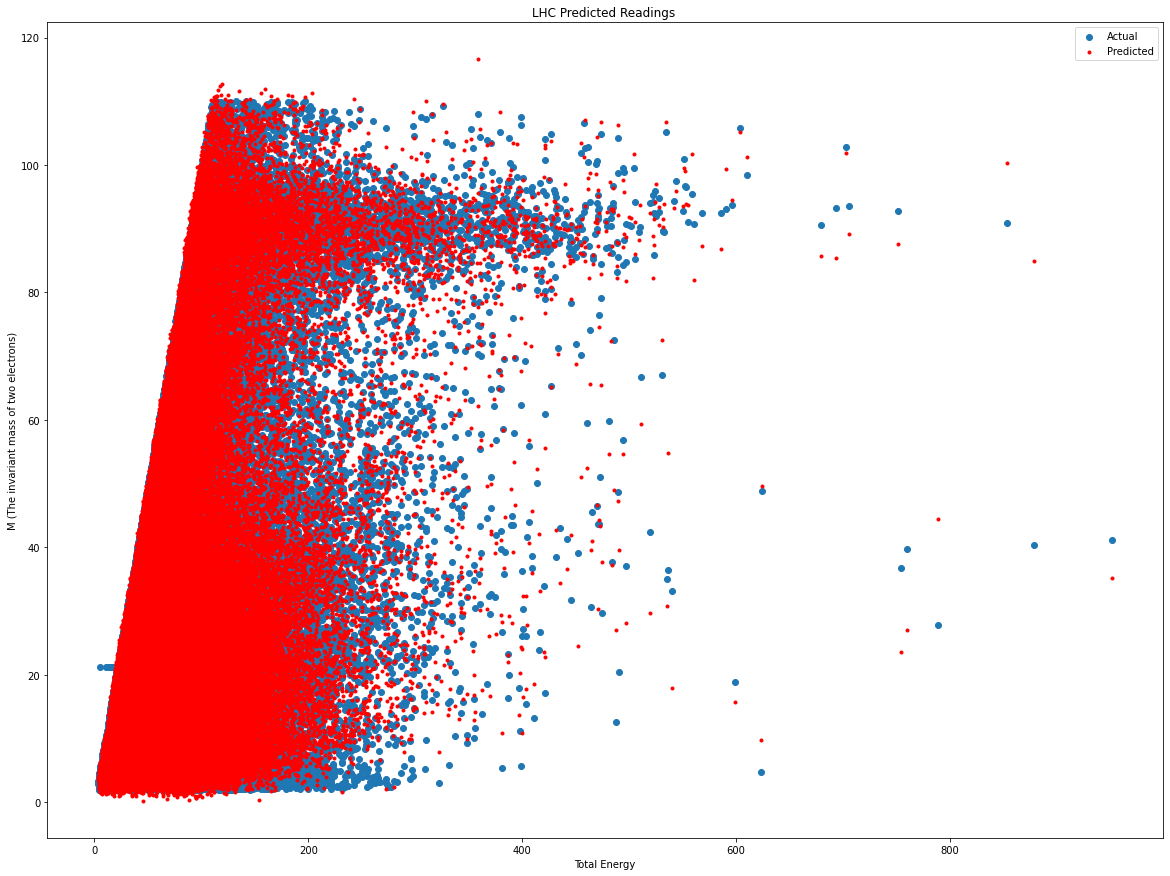

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.scatter(data3['Total Energy'],data3['M'],label='Actual')
plt.scatter(data3['Total Energy'],data3['Prediction'],label='Predicted',color='r',marker='.')
plt.title("LHC Predicted Readings ")
plt.xlabel("Total Energy")
plt.ylabel("M (The invariant mass of two electrons)")
plt.legend()
plt.show()


In [19]:
pip install git+https://github.com/pycaret/pycaret.git

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-2d8k34hh
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-2d8k34hh
  Resolved https://github.com/pycaret/pycaret.git to commit f93e7087a671458a20bed6dd3a8bcca891034cfc
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [20]:
from pycaret.regression import setup, compare_models, predict_model
pycaret_automl = setup(data=data, target = 'M', session_id=669)

,Description,Value
0,Session id,669
1,Target,M
2,Target type,Regression
3,Data shape,"(100000, 18)"
4,Train data shape,"(69999, 18)"
5,Test data shape,"(30001, 18)"
6,Numeric features,17
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [21]:
pycaret_models = compare_models(sort='MSE', budget_time=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.1873,39.6132,6.2914,0.9376,0.3661,0.3649,45.7630
knn,K Neighbors Regressor,4.1958,44.1419,6.6414,0.9304,0.3301,0.2942,6.3530
dt,Decision Tree Regressor,6.5923,156.8289,12.4574,0.7530,0.5498,0.4798,0.8500
lasso,Lasso Regression,14.1879,377.9467,19.4388,0.4045,0.7359,1.0615,0.1220
en,Elastic Net,14.1861,377.9501,19.4388,0.4045,0.7358,1.0612,0.1590
br,Bayesian Ridge,14.1667,377.9928,19.4399,0.4045,0.7357,1.0593,0.0740
lr,Linear Regression,14.1629,377.9953,19.4400,0.4045,0.7355,1.0586,0.9050
ridge,Ridge Regression,14.1654,377.9985,19.4401,0.4045,0.7356,1.0592,0.0610
lar,Least Angle Regression,14.1654,377.9985,19.4401,0.4045,0.7356,1.0592,0.0600
huber,Huber Regressor,13.3622,394.8912,19.8690,0.3779,0.7171,0.8724,0.7920


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [22]:
print(pycaret_models)

RandomForestRegressor(n_jobs=-1, random_state=669)


In [23]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor(n_jobs=-1, random_state=669)
model_2.fit(x_train,y_train)
model_2.score(x_test,y_test)

0.9434759806106012

In [24]:
pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.8/410.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
from autogluon.tabular import TabularPredictor
autogluon_automl = TabularPredictor(label='M', problem_type='regression', eval_metric='mean_squared_error')
autogluon_automl.fit(train_data=data, time_limit=7*60)

No path specified. Models will be saved in: "AutogluonModels/ag-20220816_134003/"
Beginning AutoGluon training ... Time limit = 420s
AutoGluon will save models to "AutogluonModels/ag-20220816_134003/"
AutoGluon Version:  0.5.2
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    100000
Train Data Columns: 17
Label Column: M
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    15488.58 MB
	Train Data (Original)  Memory Usage: 13.6 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generator

[1000]	valid_set's l2: 6.40339
[2000]	valid_set's l2: 4.64087
[3000]	valid_set's l2: 3.99181
[4000]	valid_set's l2: 3.62967
[5000]	valid_set's l2: 3.41575
[6000]	valid_set's l2: 3.26248
[7000]	valid_set's l2: 3.14935
[8000]	valid_set's l2: 3.06844
[9000]	valid_set's l2: 2.99941
[10000]	valid_set's l2: 2.9447


	-2.9447	 = Validation score   (-mean_squared_error)
	85.1s	 = Training   runtime
	1.19s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 330.18s of the 330.18s of remaining time.


[1000]	valid_set's l2: 7.11061
[2000]	valid_set's l2: 4.7724
[3000]	valid_set's l2: 3.95586
[4000]	valid_set's l2: 3.66084
[5000]	valid_set's l2: 3.38966
[6000]	valid_set's l2: 3.24007
[7000]	valid_set's l2: 3.16966
[8000]	valid_set's l2: 3.11498
[9000]	valid_set's l2: 3.07093
[10000]	valid_set's l2: 3.04411


	-3.0441	 = Validation score   (-mean_squared_error)
	80.8s	 = Training   runtime
	0.9s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 247.22s of the 247.21s of remaining time.
	-31.9121	 = Validation score   (-mean_squared_error)
	210.08s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 34.65s of the 34.65s of remaining time.
	Ran out of time, early stopping on iteration 1724.
	-5.2683	 = Validation score   (-mean_squared_error)
	34.75s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the -0.14s of remaining time.
	-2.2961	 = Validation score   (-mean_squared_error)
	0.21s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 420.43s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20220816_134003/")


In [26]:
autogluon_automl.leaderboard()

                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -2.296142       2.105529  200.865024                0.000675           0.210383            2       True          7
1           LightGBMXT  -2.944701       1.190326   85.096261                1.190326          85.096261            1       True          3
2             LightGBM  -3.044110       0.900280   80.804476                0.900280          80.804476            1       True          4
3             CatBoost  -5.268252       0.014248   34.753902                0.014248          34.753902            1       True          6
4      RandomForestMSE -31.912106       0.204815  210.081921                0.204815         210.081921            1       True          5
5       KNeighborsDist -37.719306       0.381605    0.169774                0.381605           0.169774            1       True          2
6       KNeighborsUnif -39.

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.296142,2.105529,200.865024,0.000675,0.210383,2,True,7
1,LightGBMXT,-2.944701,1.190326,85.096261,1.190326,85.096261,1,True,3
2,LightGBM,-3.044110,0.900280,80.804476,0.900280,80.804476,1,True,4
3,CatBoost,-5.268252,0.014248,34.753902,0.014248,34.753902,1,True,6
4,RandomForestMSE,-31.912106,0.204815,210.081921,0.204815,210.081921,1,True,5
5,KNeighborsDist,-37.719306,0.381605,0.169774,0.381605,0.169774,1,True,2
6,KNeighborsUnif,-39.907067,0.399801,0.717198,0.399801,0.717198,1,True,1


In [27]:
autogluon_automl.evaluate(data)

Evaluation: mean_squared_error on test data: -0.45584201552884873
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "mean_squared_error": -0.45584201552884873,
    "root_mean_squared_error": -0.6751607331064572,
    "mean_absolute_error": -0.45015964970852096,
    "r2": 0.9992848124068835,
    "pearsonr": 0.9996424047585384,
    "median_absolute_error": -0.34368342285156306
}


{'mean_squared_error': -0.45584201552884873,
 'root_mean_squared_error': -0.6751607331064572,
 'mean_absolute_error': -0.45015964970852096,
 'r2': 0.9992848124068835,
 'pearsonr': 0.9996424047585384,
 'median_absolute_error': -0.34368342285156306}

<AxesSubplot:>

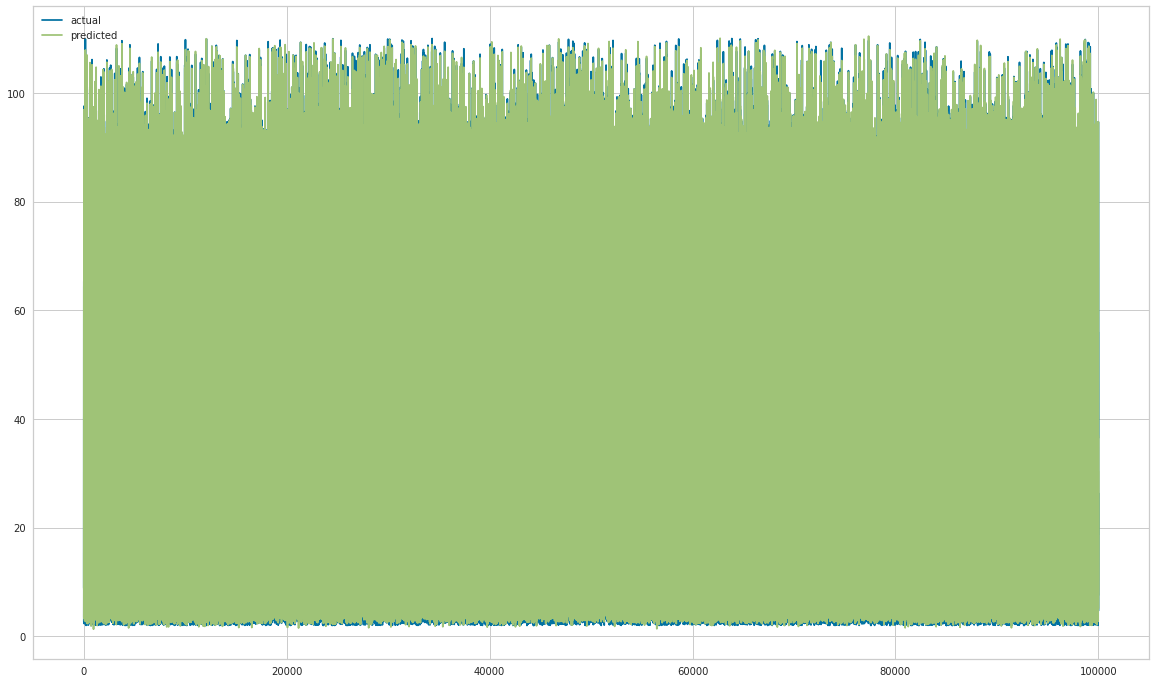

In [28]:
y_pred = autogluon_automl.predict(x)
autogluon_compare = pd.DataFrame(data={'actual': data['M'], 'predicted': y_pred})
autogluon_compare.plot(figsize=(20, 12))

In [29]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.20.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkg0ipn5t
  JVM stdout: /tmp/tmpkg0ipn5t/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkg0ipn5t/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_oq2gwv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4.396 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [30]:
h2o_frame = h2o.H2OFrame(data)
x = h2o_frame.columns
y = 'M'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [31]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=667)
h2o_automl.train(x=x, y=y, training_frame=h2o_frame)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_2_AutoML_1_20220816_135030

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 4.440466525928968
RMSE: 2.1072414493666756
MAE: 1.387389215961505
RMSLE: 0.1457197495114692
R^2: 0.9930801727325539
Mean Residual Deviance: 4.440466525928968
Null degrees of freedom: 9950
Residual degrees of freedom: 9948
Null deviance: 6385576.988712682
Residual deviance: 44187.08239951916
AIC: 43082.26191838449

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 8.97745036789035
RMSE: 2.9962393709265536
MAE: 1.8633779191087363
RMSLE: 0.19719332989024946
R^2: 0.9859149422314927
Mean Residual Deviance: 8.97745036789035
Null degrees of freedom: 99999
Residual degrees of freedom: 99997
Null deviance: 63738745.45382348

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.863567e+00,0.023367,1.859322e+00,1.834101e+00,1.863079e+00,1.861787e+00,1.899545e+00
1,mean_residual_deviance,8.977925e+00,0.504324,8.925574e+00,8.267993e+00,8.852610e+00,9.196994e+00,9.646455e+00
2,mse,8.977925e+00,0.504324,8.925574e+00,8.267993e+00,8.852610e+00,9.196994e+00,9.646455e+00
3,null_deviance,1.274775e+07,161772.270000,1.298030e+07,1.276751e+07,1.268330e+07,1.277299e+07,1.253463e+07
4,r2,9.859099e-01,0.000861,9.862710e-01,9.870107e-01,9.859248e-01,9.856881e-01,9.846549e-01
5,residual_deviance,1.795328e+05,9550.411000,1.781812e+05,1.658394e+05,1.785129e+05,1.827995e+05,1.923310e+05
6,rmse,2.995369e+00,0.084341,2.987570e+00,2.875412e+00,2.975334e+00,3.032655e+00,3.105874e+00
7,rmsle,1.971845e-01,0.004978,1.915190e-01,1.933561e-01,1.981294e-01,1.987282e-01,2.041897e-01


In [32]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns = "ALL")
h2o_models

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_2_AutoML_1_20220816_135030,8.97745,2.99624,1.86338,0.197193,8.97745,916,0.04031,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20220816_135030,8.9778,2.9963,1.86343,0.197197,8.9778,1010,0.041543,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20220816_135030,8.9789,2.99648,1.8635,0.197201,8.9789,1158,0.035854,StackedEnsemble
GBM_1_AutoML_1_20220816_135030,9.80828,3.13182,1.96321,0.202485,9.80828,21427,0.033656,GBM
XGBoost_1_AutoML_1_20220816_135030,17.9824,4.24056,2.80952,nan,17.9824,13344,0.003591,XGBoost
XGBoost_2_AutoML_1_20220816_135030,40.2978,6.34805,4.38938,nan,40.2978,2288,0.000756,XGBoost
DeepLearning_1_AutoML_1_20220816_135030,43.0648,6.56238,4.86101,nan,43.0648,97,0.001166,DeepLearning
DRF_1_AutoML_1_20220816_135030,65.3734,8.08538,5.03867,0.415913,65.3734,895,0.000497,DRF
XRT_1_AutoML_1_20220816_135030,83.0317,9.11217,5.43257,0.464304,83.0317,1115,0.000521,DRF
GBM_4_AutoML_1_20220816_135030,96.8189,9.83966,7.35447,0.518101,96.8189,1880,0.002961,GBM


In [33]:
from h2o.model.regression import h2o_mean_squared_error,h2o_explained_variance_score

h2o_frame_test = h2o.H2OFrame(data)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(data[['M']])

h2o_mean_squared_error(y_actual, y_pred)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


4.4819184659916855

In [34]:
h2o_explained_variance_score(y_actual,y_pred)

0.9929681609827423

In [35]:
y_pred = h2o.as_list(y_pred)
y_pred = y_pred.values.flatten()
y_pred.shape

(100000,)

<AxesSubplot:>

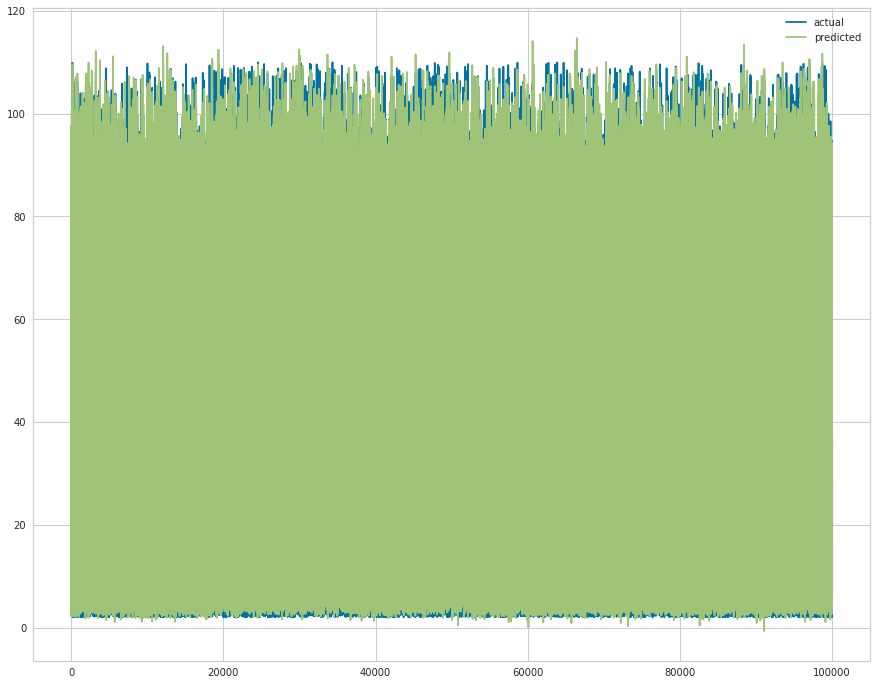

In [36]:
h2o_model = pd.DataFrame(data={'actual': data['M'], 'predicted': y_pred})
h2o_model.plot(figsize=(15, 12))